# Regression in Scikit-learn

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#another
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
# import dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
df_linear = df[['age', 'fare']]
df_linear.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [10]:
# simple linear regression 

x= df[['age']]
y= df['fare']

In [11]:
x

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [19]:
df_linear.age.fillna(value= df_linear['age'].mean(), inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_5448\3789370711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value= df_linear['age'].mean(), inplace=True)


In [13]:
x

,age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [20]:
df_linear.isnull().sum()/len(x)*100

age     0.0
fare    0.0
dtype: float64

In [15]:
x.shape

(891, 1)

In [16]:
y.shape

(891,)

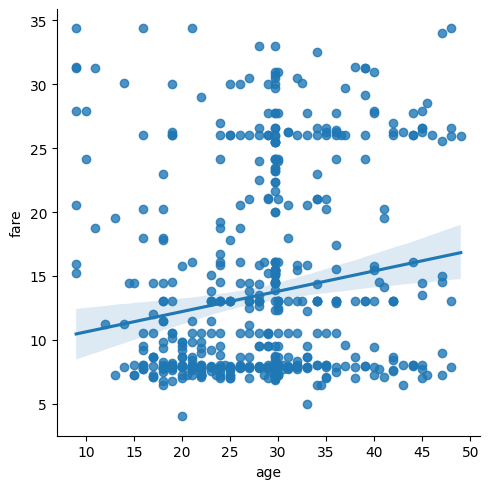

In [49]:
# plot
sns.lmplot(data=df_linear, x='age', y='fare')

<AxesSubplot: ylabel='age'>

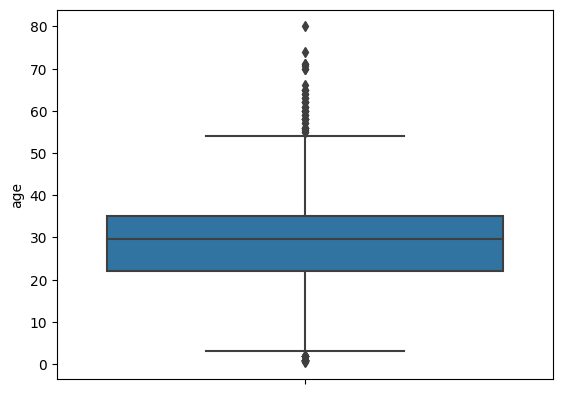

In [34]:
sns.boxplot(data=df_linear, y='age')

In [39]:
df_linear = df_linear[(df_linear['age'] > 8) & (df_linear['age'] < 50)]

<AxesSubplot: ylabel='age'>

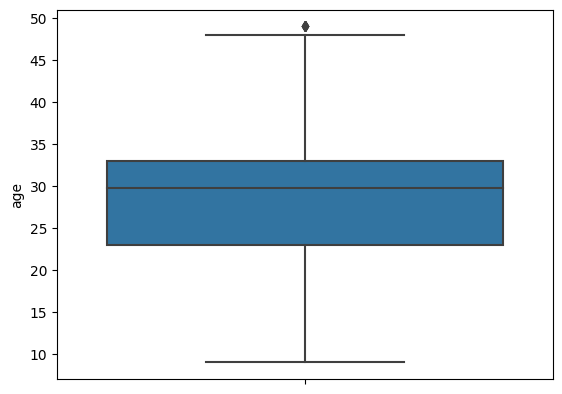

In [40]:
sns.boxplot(data=df_linear, y='age')

<AxesSubplot: ylabel='fare'>

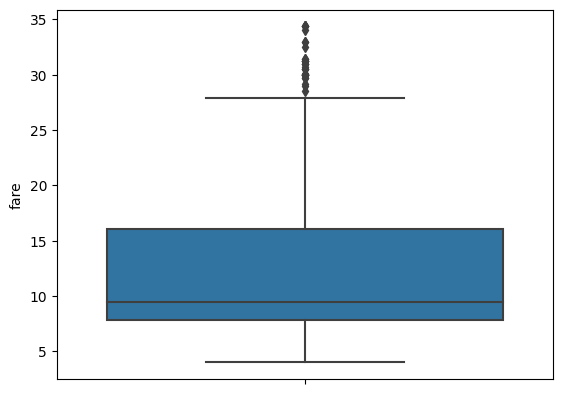

In [47]:
sns.boxplot(data=df_linear, y='fare')

In [46]:
df_linear = df_linear[(df_linear['fare'] > 1) & (df_linear['fare'] < 35)]

In [72]:
X = df_linear[['age']]
Y = df_linear['fare']

In [73]:
#model
model = LinearRegression()

#train the model
model.fit(X,Y)

# predict the model
model.predict([[25]])

c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.00598772])

In [74]:
# model ecaluation with mitrics
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8)

# model
model = LinearRegression()

#train
model.fit(X_train, Y_train)

#pridiction
predictions =model.predict(X_test)


<AxesSubplot: xlabel='fare'>

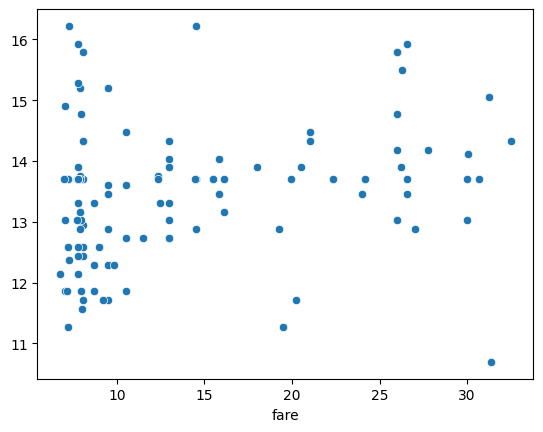

In [75]:
#compare
sns.scatterplot(x= Y_test,y=predictions)

In [76]:
model.score(X_test,Y_test)

0.042188385182170274

In [81]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae =mean_absolute_error(y_true=Y_test, y_pred=predictions)
MSE =mean_squared_error(y_true=Y_test, y_pred=predictions)
RMSE = mean_squared_error(y_true=Y_test, y_pred=predictions, squared=False)
R2=r2_score(y_true=Y_test, y_pred=predictions)

print("Mean Absolute Error:", mae)
print("Mean Square Error:" , MSE)
print("Root MSE:", RMSE)
print("R square:", R2)


Mean Absolute Error: 6.039648220666312
Mean Square Error: 54.65060456563841
Root MSE: 7.392604721317
R square: 0.042188385182170274


In [82]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

7.392604721317